In [116]:
import pandas as pd
import numpy as np
import math
# import scipy as sp
import matplotlib.pyplot as plt
from time import sleep as fallasleep
from source.local_package import *

In [ ]:

import krakenex
from pykrakenapi import KrakenAPI

In [162]:
color_box = ['#1f77b4','#ff7f0e','#2ca02c','#d62728',
             '#9467bd','#8c564b','#e377c2','#7f7f7f',
             '#bcdb22','#17becf']

In [163]:
api = krakenex.API()
k = KrakenAPI(api)
coins = ["ETH", "BTC", "XRP", "ADA", "DOT"]
gapmin= 1440
coins = [coin+"USD" for coin in coins]
df = {}
colormapper = {}
for _,coin in enumerate(coins):
    data, last = k.get_ohlc_data(coin, interval = gapmin, ascending = True)
    df[coin]=data
    colormapper[coin] = color_box[_]
    fallasleep(1)


In [164]:
df[coin].head(2)

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-08-18,1597708800,50.0000,50.70,2.90,3.1099,3.4332,3.415657e+06,8207
2020-08-19,1597795200,3.1099,3.16,2.71,2.9175,2.9720,1.378930e+06,7205


In [186]:
df_coins = pd.DataFrame(columns=coins)
df_coins_vol = pd.DataFrame(columns=coins)
for coin in coins:
    df_coins[coin] = df[coin]['close']
    df_coins_vol[coin] = df[coin]['volume']

##### Count the total number of nan values

In [187]:
df_coins.isna().sum()

ETHUSD      0
BTCUSD      0
XRPUSD      0
ADAUSD      0
DOTUSD    272
dtype: int64

In [190]:
df_coins = df_coins.dropna()
df_coins_vol = df_coins_vol.dropna()

In [191]:
display(df_coins.head(5))
display(df_coins_vol.head(5))

,ETHUSD,BTCUSD,XRPUSD,ADAUSD,DOTUSD
dtime,,,,,
2020-08-18,422.62,11957.0,0.30292,0.137218,3.1099
2020-08-19,407.57,11757.4,0.28992,0.129678,2.9175
2020-08-20,416.20,11864.6,0.29246,0.134305,2.9090
2020-08-21,387.83,11522.7,0.27921,0.123109,3.0776
2020-08-22,395.52,11672.7,0.28615,0.125193,4.4515


,ETHUSD,BTCUSD,XRPUSD,ADAUSD,DOTUSD
dtime,,,,,
2020-08-18,77628.456012,6055.424528,2.874486e+07,1.897103e+07,3.415657e+06
2020-08-19,91227.613999,5945.744553,2.600184e+07,1.796792e+07,1.378930e+06
2020-08-20,58454.613919,3273.143888,1.112394e+07,1.547280e+07,8.888622e+05
2020-08-21,85385.531258,3996.106398,1.907259e+07,2.393638e+07,1.066974e+06
2020-08-22,57008.743265,2777.535563,1.240805e+07,9.639759e+06,4.022332e+06


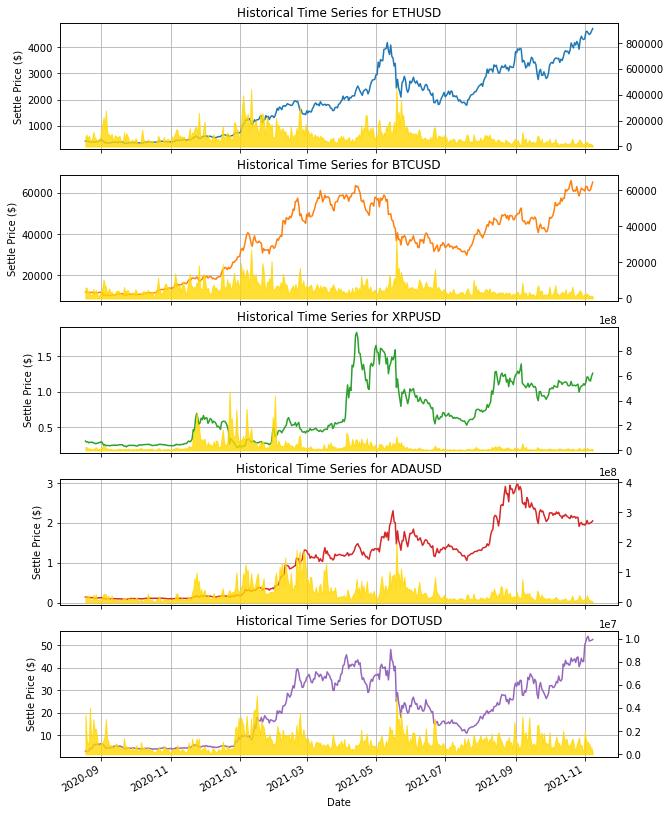

In [198]:
# fig = plt.figure(figsize=(8,6))
fig, ax = plt.subplots(len(coins),1,figsize=(10,15))
for _,coin in enumerate(coins):
    ax[_].plot(df_coins.index, df_coins[coin].values,
               color=colormapper[coin], label='settle price')
    ax[_].set_title(f"Historical Time Series for {coin}")
    ax[_].set_ylabel("Settle Price ($)")
    ax[_].set_xlabel("Date")
    ax_twin = ax[_].twinx()
    ax_twin.fill_between(df_coins_vol.index, 0, df_coins_vol[coin].values,
                         color='gold', alpha=0.8, label='volume')
    ax_ylim = ax_twin.get_ylim()
    ax_twin.set_ylim(ax_ylim[0], ax_ylim[1]*2)
    ax[_].grid()
fig.autofmt_xdate()
plt.show()

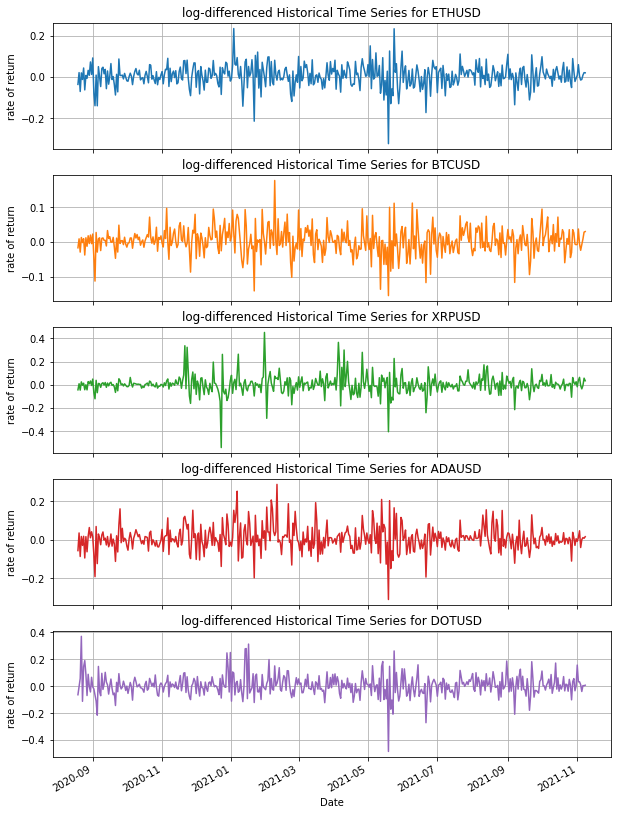

In [205]:
# fig = plt.figure(figsize=(8,6))
fig, ax = plt.subplots(len(coins),1,figsize=(10,15))
df_diff = df_coins.apply(np.log).diff().dropna().copy()
for _,coin in enumerate(coins):
    ax[_].plot(df_diff.index, df_diff[coin].values,
               color=colormapper[coin], label='settle price')
    ax[_].set_title(f"log-differenced Historical Time Series for {coin}")
    ax[_].set_ylabel("rate of return")
    ax[_].set_xlabel("Date")
    ax[_].grid()
fig.autofmt_xdate()
plt.show()

### Check if the log-differenced series are stationary

In [207]:
n_obs = math.floor(len(df_diff[coin])*0.3)
df_train, df_test = df_diff[0:-n_obs], df_diff[-n_obs:]

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
for coin in coins:
    print(f'ADF Test: {coin} time series')
    adf_test(df_train[coin])

ADF Test: ETHUSD time series
ADF Statistics: -5.304152
p-value: 0.000005
Critical values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
ADF Test: BTCUSD time series
ADF Statistics: -18.953079
p-value: 0.000000
Critical values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
ADF Test: XRPUSD time series
ADF Statistics: -17.813287
p-value: 0.000000
Critical values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
ADF Test: ADAUSD time series
ADF Statistics: -19.021348
p-value: 0.000000
Critical values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
ADF Test: DOTUSD time series
ADF Statistics: -8.271936
p-value: 0.000000
Critical values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


#### We see that all the `p-value`s are less than the significance level (p < 0.05).
#### We conclude that our time-series are stationary

In [208]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_train, variables = df_train.columns)


,ETHUSD_x,BTCUSD_x,XRPUSD_x,ADAUSD_x,DOTUSD_x
ETHUSD_y,1.0000,0.0277,0.0010,0.0001,0.0929
BTCUSD_y,0.0009,1.0000,0.0002,0.0000,0.0260
XRPUSD_y,0.0088,0.1980,1.0000,0.0178,0.0109
ADAUSD_y,0.0000,0.0653,0.0237,1.0000,0.0060
DOTUSD_y,0.0001,0.1431,0.0010,0.0024,1.0000


#### We see that for row 2, all columns `p-value` less than 0.05 except for the response variable itself, thus we conclude that other coins Granger causes Bitcoin